# Banknote Authentication using K-means Clustering

---
<p align="justify">This analysis uses K-Means clustering to group banknotes based on their physical measurements (diagonal, length, etc.). After preprocessing the data and determining the optimal number of clusters through the elbow method, the algorithm effectively separates genuine from counterfeit notes by identifying distinct patterns in their dimensional characteristics. This approach provides an automated framework for detecting potentially fraudulent currency.



---



## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

## Load Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/fake_bills.csv', sep=';')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


## Data Preprocessing

In [4]:
# Drop the label column
X = df.drop('is_genuine', axis=1)

# Handle missing values
X = X.fillna(X.mean())

## Plot Diagonal vs. Length

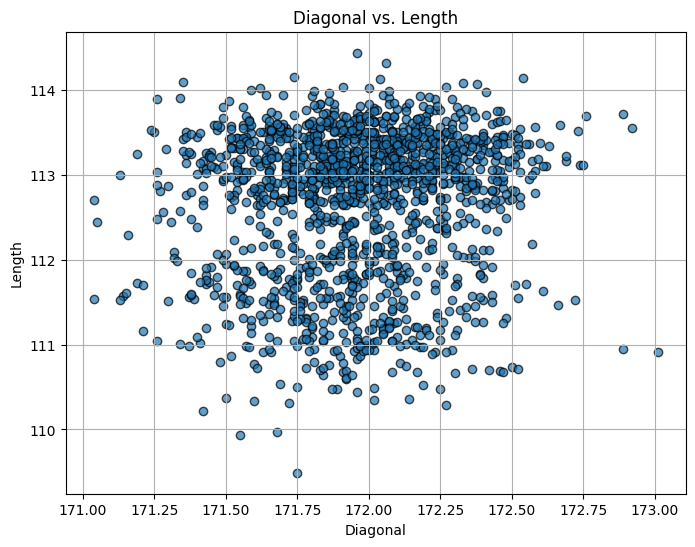

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X['diagonal'], X['length'], alpha=0.7, edgecolor='k')
plt.title('Diagonal vs. Length')
plt.xlabel('Diagonal')
plt.ylabel('Length')
plt.grid(True)
plt.show()

## Features Standardisation

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Determine the Optimal Number of Clusters Using the Elbow Method

In [8]:
wcss = [] # Create an empty list

k_values = range(1, 11)

for k in k_values:
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

## Plot the Elbow Curve

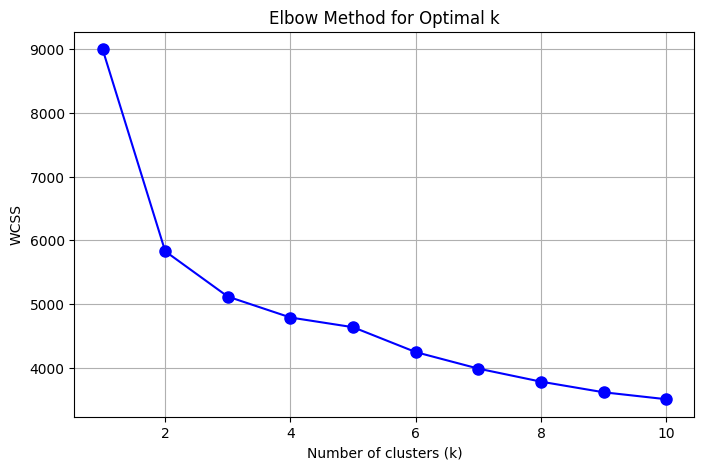

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

## Implement K-Means

In [10]:
k = 3
kmeans = KMeans(n_clusters=k,random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

## Plot the Clusters

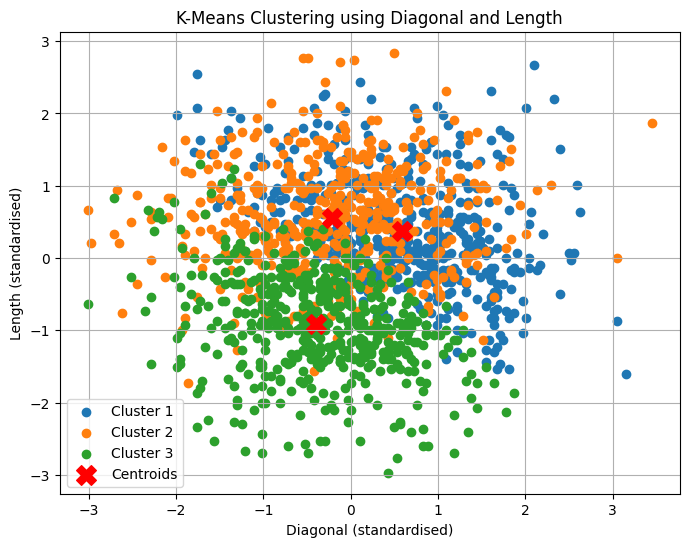

In [11]:
plt.figure(figsize=(8, 6))

# Plot each cluster
for i in range(k):
    plt.scatter(X_scaled[labels == i, 0], X_scaled[labels == i, 1], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.xlabel('Diagonal (standardised)')
plt.ylabel('Length (standardised)')
plt.title('K-Means Clustering using Diagonal and Length')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

<p align="justify">The K-means clustering analysis of banknote dimensions reveals three distinct clusters, with Cluster 3 (green points) showing significantly different characteristics from Clusters 1 and 2.

<p align="justify">The clear separation of Cluster 3, particularly along the standardised length axis where it displays consistently lower values, strongly indicates these are counterfeit bills. The dimensional differences between genuine and counterfeit notes are evident in how Cluster 3 points concentrate in the lower portion of the plot, suggesting counterfeiters failed to accurately replicate the length-to-diagonal ratio of authentic currency.

<p align="justify">This clustering approach effectively differentiates counterfeit from genuine banknotes based solely on their physical measurements, demonstrating the value of unsupervised learning techniques in fraud detection.